In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Image preprocessing

In [7]:
training_set=tf.keras.utils.image_dataset_from_directory(
    'train',#directory of dataset
    labels="inferred", #Infered means select the name of the directory as label
    label_mode="categorical", #categorical is given because we have multiple classes in dataset, if we have 2 classes we can give binary
    class_names=None, #Used to control the order of classes
    color_mode="rgb",
    batch_size=32, #At a time we are feeding 32 training images
    image_size=(128, 128),
    shuffle=True, #Random datas will be choosen rather than alphabetical order
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


## Validation Image Preprocessing

In [8]:
validation_set=tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred", 
    label_mode="categorical",  
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True, 
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


### OverShooting
Overshooting refers to a situation during the training of a model where the optimization algorithm takes steps that are too large.
#### To avoid Overshooting 
1. Choose small learning rate default 0.001 we are taking 0.0001
2. There may be chance of underfitting, so increase number of neuron
3. Add more Convolution layer to extract more feature from images there may be possibility that model unable to capture relevent feature or model is confusing due to lack of feature so feed with more feature

# Building Model

In [5]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [6]:
model=Sequential() #This is particularly useful for models that consist of a single input layer, multiple hidden layers, and a single output layer, where the layers are added sequentially, one after the other.

#####  Conv2D
Conv2 dApplies 32 filters, each of size 3×3with 'same' padding, meaning the output will have the same dimensions as the input. The activation function is ReLU (Rectified Linear Unit), which introduces non-linearity. It is basically used to apply filter for image to learn complex structutes.
#### MaxPool2D
MaxPool2d  Reduces the spatial dimensions (height and width) by taking the maximum value over a 2×2 window. It is basically used to Reduce the unwanted features in a image


###### padding ='same '
It means If you want to maintain the original size of the input image across layers, padding='same' is a good choice. This type of padding adds zeros around the input image so that the output feature map has the same spatial dimensions (height and width) as the input. 
###### padding='valid' 
It is often used when you want to progressively reduce the spatial dimensions of your input and focus on extracting features.It can be beneficial when you want to focus more on the central part of the image, as the edges are excluded from some convolutional operations. To boost training speed no padding is good

In [7]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3])) #We are applying 3 different type of filter for matrix.Input shape is width and height and rgb of image
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))#The size of sliding window is pool_size and stride is movement of sliding window

C:\Users\Prasanna\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu')) 
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [9]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [10]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

##### Dropdown
We are dropping 25% of neurons to avoid overfitting.This prevents the network from becoming overly reliant on specific neurons, which helps in learning more robust and generalized features.When the parameters is more the model learns the noise and specifies the training data too well, like it memorize the training data. To reduce this we have to use this

In [12]:
 model.add(Dropout(0.25))

In [13]:
model.add(Flatten()) #It  is used to convert multi-dimensional input data into a one-dimensional vector. This is particularly useful when transitioning from the convolutional layers to the fully connected (dense) layers

#### DenseLayer
Dense layers are used to learn complex features and patterns by combining the features from the previous layers.
Units=1500 specifies that the dense layer will have 1500 neurons.The large number of units indicates that this layer will have a high capacity to learn complex representations but also increases the risk of overfitting if not managed properly

In [14]:
model.add(Dense(units=1500,activation='relu')) #ReLU introduces non-linearity into the model, allowing it to learn complex patterns and relationships in the data. Without non-linear activation functions, a neural network would behave like a linear model, limiting its capacity to model complex functions.

In [15]:
model.add(Dropout(0.4))

The output layer with units=38 and softmax activation converts the final learned representations into a probability distribution over the 38 classes. This is essential for classification tasks because it allows the model to predict which class an input belongs to by selecting the class with the highest probability

In [16]:
#Output Layer
model.add(Dense(units=38,activation='softmax')) #There are 38 classes so the units is given as 38.Softmax gives probability for each neuron for each classes.While Conv2D filters help detect features, ReLU ensures that the network can model complex, non-linear relationships between these features. 

### Compiling Model

In [17]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy',metrics=['accuracy']) #Since we are dealing with multiple classes we use categorical for loss

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

## Model training

In [19]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10) #This line is used to train the neural network model. epochs specifies the number of times the model go through the training data. Validation data is used to evaluate model performance

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1644s 747ms/step - accuracy: 0.3897 - loss: 2.1681 - val_accuracy: 0.8206 - val_loss: 0.5843
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 6316s 3s/step - accuracy: 0.8372 - loss: 0.5201 - val_accuracy: 0.8987 - val_loss: 0.3182
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1556s 708ms/step - accuracy: 0.9055 - loss: 0.2937 - val_accuracy: 0.9223 - val_loss: 0.2418
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1671s 761ms/step - accuracy: 0.9381 - loss: 0.1902 - val_accuracy: 0.9134 - val_loss: 0.2826
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1654s 753ms/step - accuracy: 0.9540 - loss: 0.1418 - val_accuracy: 0.9378 - val_loss: 0.2078
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1943s 884ms/step - accuracy: 0.9624 - loss: 0.1125 - val_accuracy: 0.9541 - val_loss: 0.1434
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1912s 870ms/step - accuracy: 0.9712 - loss: 0.0874 - val_accuracy: 0.9573 - val_loss: 0.1342
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1829s 832ms/step

## Saving Model

In [2]:
model.save('trained_plant_disease_model.keras')

NameError: name 'model' is not defined

In [ ]:
training_history.history #Return Dictionary of history


In [1]:
from keras.models import load_model


In [2]:
model2 = load_model('trained_plant_disease_model.keras')


In [3]:
model2.summary()  # Print the model architecture


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,685,526 (59.84 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,842,764 (29.92 MB)

## Model Evaluation

In [9]:
#Model Evaluation on Training Set
train_loss,train_acc=model2.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 401s 182ms/step - accuracy: 0.9949 - loss: 0.0167


In [10]:
print(train_loss,train_acc)

0.01732458360493183 0.9947649240493774


In [11]:
#Model Evaluation on Validation Set
val_loss,val_acc=model2.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 101s 184ms/step - accuracy: 0.9737 - loss: 0.0895


In [12]:
print(val_loss,val_acc)

0.09538358449935913 0.9721147418022156


### Some other metrics for model evaluation

In [13]:
class_name=validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [14]:
#Since our test set is not ordered like 38 directories and all the images are just arranged randomly we are using validation set as test set
test_set=tf.keras.utils.image_dataset_from_directory(
    'valid', 
    labels="inferred", 
    label_mode="categorical",  
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False, 
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [15]:
y_pred=model2.predict(test_set) #It gives probability of all 38 classes for each images. Our task is to choose the maximum Probability that is done in below step.
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 99s 180ms/step


(array([[1.0000000e+00, 2.6458469e-09, 9.8511095e-12, ..., 2.1371840e-19,
         5.0146389e-16, 1.6843586e-16],
        [1.0000000e+00, 5.5751813e-11, 4.1249908e-13, ..., 7.7398062e-20,
         7.0233763e-18, 9.8116988e-18],
        [1.0000000e+00, 4.5594716e-14, 1.6209675e-14, ..., 1.8865302e-22,
         8.1627506e-18, 2.1145352e-18],
        ...,
        [6.9894597e-08, 3.2455296e-09, 2.7245567e-06, ..., 1.5619380e-08,
         1.3221047e-08, 9.9993217e-01],
        [3.0260439e-10, 1.7124789e-12, 1.5887512e-09, ..., 3.9212680e-10,
         1.3109873e-10, 9.9999940e-01],
        [1.6256755e-16, 4.8979628e-19, 1.0674014e-16, ..., 1.7391977e-17,
         1.6611898e-15, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [16]:
predicted_categories=tf.argmax(y_pred,axis=1) #argmax will extract the maximum value in the above array and return the index of that maximum value. axis=1 means returns the index in column wise
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

##### true labels are y which represents the category of disease.This line is concatenating all the labels (y) from the test_set into a single tensor called true_categories. When you evaluate your model's performance, you need the true labels to compare against the predicted labels. By having all true labels in one tensor, you can efficiently compute evaluation metrics such as accuracy, precision, recall, F1 score, etc. Simply it is a classnames but class names are human readable and these true labels are one hot encoded vectors to do mathematical operation or evaluation

In [17]:
true_categories=tf.concat([y for x,y in test_set],axis=0) #For each element in the test_set, it assumes that the element is a tuple (x, y), where x represents the input data (e.g., images of plants) and y represents the labels (e.g., categories of diseases).
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [18]:
Y_true=tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

### Presision, recall, F1 score
Presision measures the percentage of predictions made by the model that are correct.
Recall measures the percentage of relevant data points that were correctly identified by the model.
F1 score is harmonic mean of precision and recall

In [19]:
from sklearn.metrics import classification_report,confusion_matrix

In [20]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.96      0.97      0.97       504
                                 Apple___Black_rot       0.99      1.00      0.99       497
                          Apple___Cedar_apple_rust       0.99      0.98      0.99       440
                                   Apple___healthy       0.98      0.96      0.97       502
                               Blueberry___healthy       0.96      0.99      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.99      0.99       421
                 Cherry_(including_sour)___healthy       0.97      0.99      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.91      0.93       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.93      0.96      0.

### Confusion Matrix
confusion matrix is a valuable tool for evaluating the performance of classification models.
It shows how many predictions are correctly and incorrectly classified for each class.
The matrix typically includes true positive, true negative,false postive and false negative.
By examining the false positives and false negatives, you can identify specific areas where the model may be struggling

In [21]:
cm=confusion_matrix(Y_true,predicted_categories)
cm

array([[491,   1,   0, ...,   0,   0,   0],
       [  0, 495,   0, ...,   0,   0,   0],
       [  0,   0, 432, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 488,   0,   0],
       [  0,   0,   0, ...,   0, 447,   0],
       [  0,   0,   1, ...,   0,   0, 479]], dtype=int64)

### Confusion Matrix Visualization
The diagonal element says that our predicted class and actaul class are same or not 

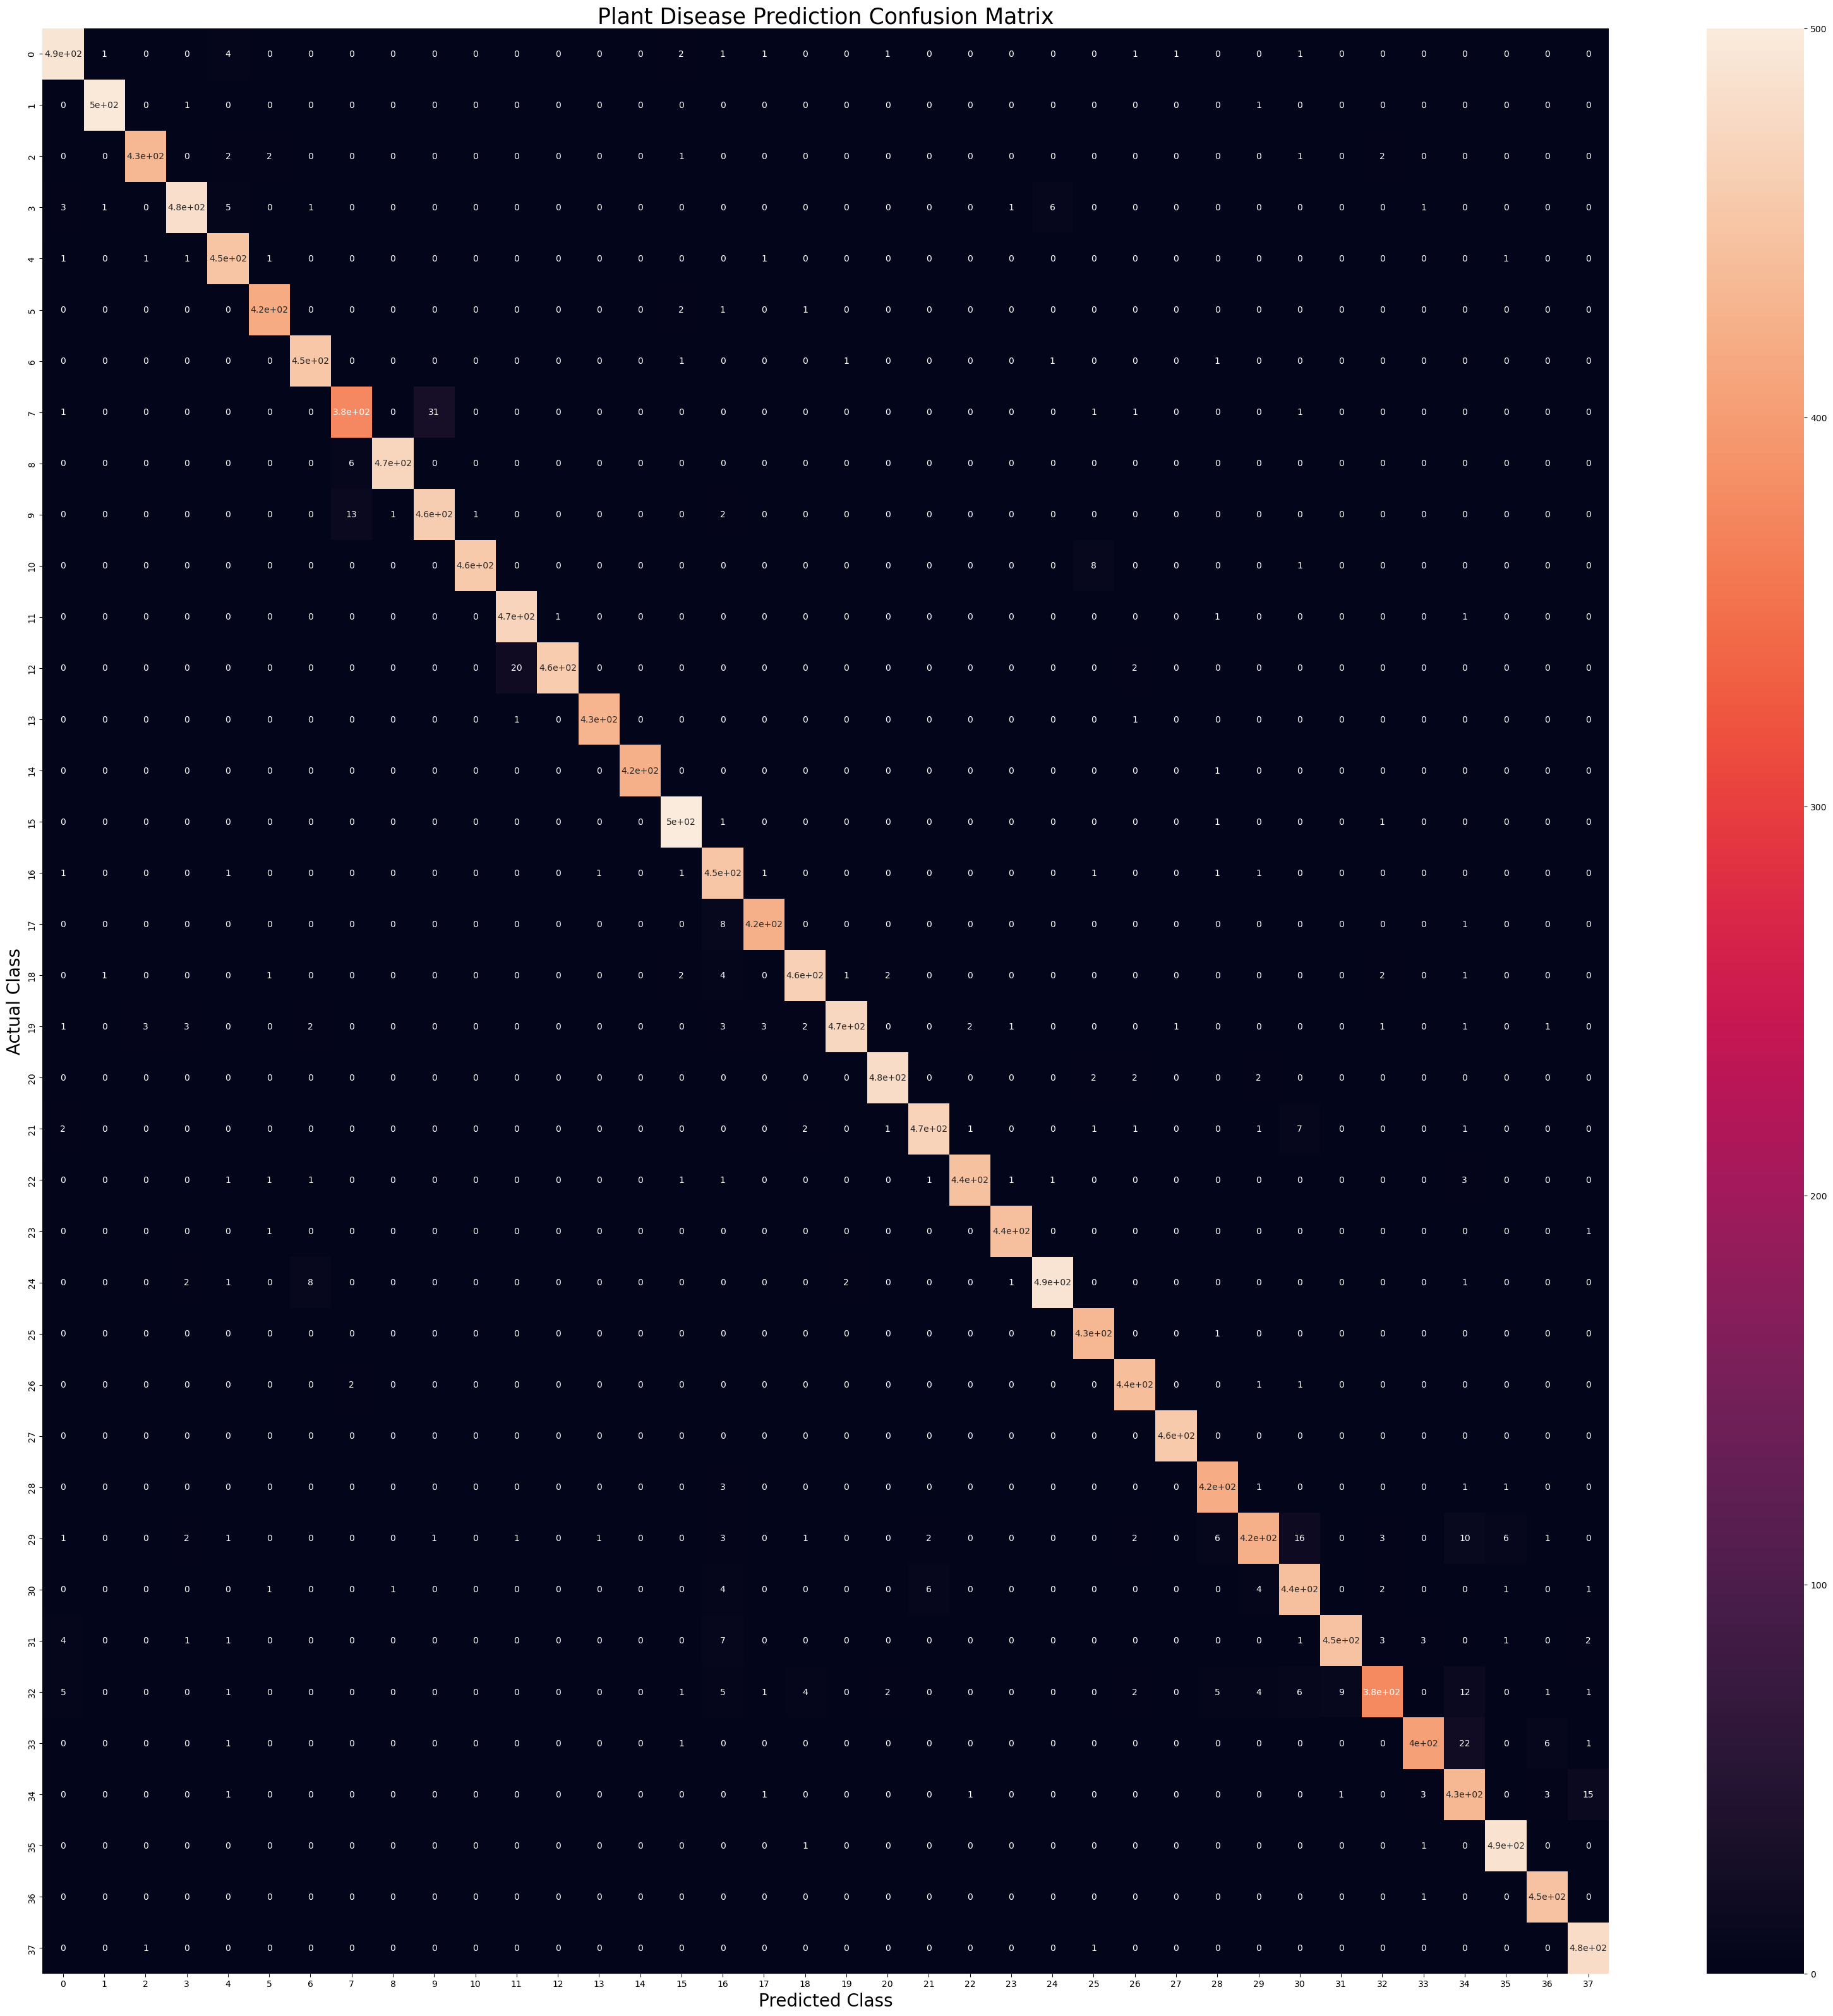

In [24]:
plt.figure(figsize=(40,40))#To increase the size of the visualization
sns.heatmap(cm,annot=True,annot_kws={'size':10}) #Heat map is used to create a graphical representation of data.annot=True argument ensures that each cell in the heatmap displays its corresponding value from the confusion matrix.annot_kws is used to increase the size of that inner boxes
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()